In [8]:
import pandas as pd
#import geocoder
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [215]:
filename1 = 'Data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported'
filename2 = 'Data/311_Service_Requests_-_Graffiti_Removal'
filename3 = 'Data/311_Service_Requests_-_Pot_Holes_Reported'
filename4 = 'Data/311_Service_Requests_-_Sanitation_Code_Complaints'

df1 = pd.read_csv(filename1 + '.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv(filename2 + '.csv', encoding = "ISO-8859-1")
df3 = pd.read_csv(filename3 + '.csv', encoding = "ISO-8859-1")
df4 = pd.read_csv(filename4 + '.csv', encoding = "ISO-8859-1")

# ANALYSIS OF GRAFFITI DATASET

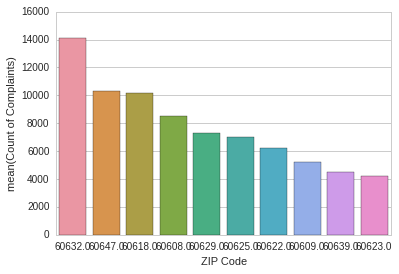

In [110]:
# finding out the worst neighborhoods
counts_df2 = df2['ZIP Code'].value_counts().reset_index()[:10]
counts_df2 = counts_df2.rename(columns = {0:'Count of Complaints', 'index':'ZIP Code'})


sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df2)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [111]:
#geocoding it to know which neighborhoods are doing the worst when it comes to graffiti complaints
geocoder.google('60632', method='reverse'), geocoder.google('60647', method='reverse'), geocoder.google('60618', method='reverse')

NameError: name 'geocoder' is not defined

In [132]:
# which type of surface has high number of requests of graffiti
df_unsorted = df2['ZIP Code'].groupby(df2['What Type of Surface is the Graffiti on?']).count().reset_index()
df_unsorted = df_unsorted.rename(columns = {'ZIP Code':'Count of Complaints'})
df_unsorted

,What Type of Surface is the Graffiti on?,Count of Complaints
0,Aluminum Siding,5040
1,Asphalt,108
2,Brick - Painted,20361
3,Brick - Unpainted,22133
4,"Cement (Sidewalk, Alley, Wall, Curb)",9251
5,Glass,2676
6,Limestone,480
7,Marble/Granite,159
8,Metal - Painted,38285
9,Metal - Unpainted,6115


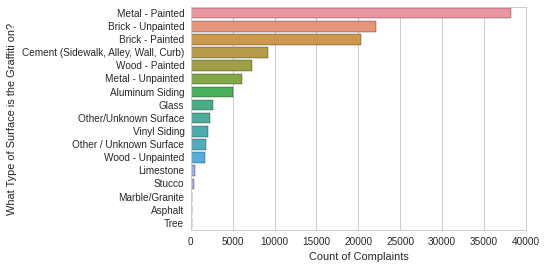

In [134]:
df_unsorted = df_unsorted.sort('Count of Complaints', ascending=False) # make the graph

sns.set_style("whitegrid")
ax = sns.barplot(x='Count of Complaints', y='What Type of Surface is the Graffiti on?', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

Metal - Painted followed by both types of Brick surfaces (Unpainted and Painted) are the largest types of graffiti requests that the City of Chicago has received.

In [135]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [136]:
d.sort(['Count of Complaints', 'ZIP Code'], ascending=False)[:10]

,What Type of Surface is the Graffiti on?,ZIP Code,Count of Complaints
430,Metal - Painted,60632,3633
417,Metal - Painted,60618,3503
120,Brick - Painted,60632,3334
424,Metal - Painted,60625,3172
444,Metal - Painted,60647,2861
181,Brick - Unpainted,60632,2546
195,Brick - Unpainted,60647,2151
407,Metal - Painted,60608,2045
168,Brick - Unpainted,60618,1839
421,Metal - Painted,60622,1800


A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.

In [188]:
# caclulating response times

In [189]:
df2['Creation Date'] = df2['Creation Date'].apply(pd.to_datetime)

In [190]:
df2['Completion Date'] = df2['Completion Date'].apply(pd.to_datetime)

In [191]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [192]:
df2['Response Time'] = df2['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

In [199]:
response_time_grouped = df2['Response Time'].groupby(df2['ZIP Code']).mean().reset_index()

In [200]:
response_time_grouped.sort('Response Time', ascending=False)

,ZIP Code,Response Time
47,60649,1.151163
43,60644,1.026087
60,60827,1.000000
34,60635,1.000000
23,60623,0.897810
45,60646,0.822222
44,60645,0.812968
15,60615,0.804444
36,60637,0.799127
18,60618,0.794129


This table shows that the ZIP Codes of 60649 and 60644 have had relatively high mean response time of requests. Nevertheless, an average response time of 1.15 is still pretty impressive. Identifying neighborhoods of those ZIP codes:

In [201]:
# finding out which neighborhoods have had high response times
geocoder.google('60649', method='reverse'), geocoder.google('60644', method='reverse')

NameError: name 'geocoder' is not defined

In [202]:
response_time_grouped.sort('Response Time', ascending=True)

,ZIP Code,Response Time
58,60666,0.000000
52,60655,0.155709
30,60631,0.202899
35,60636,0.226667
20,60620,0.297980
0,0,0.309524
4,60604,0.381579
22,60622,0.426355
59,60707,0.438538
53,60656,0.443878


This table shows that the ZIP Codes of 60666 and 60655 have had relatively low mean response time of requests. Identifying neighborhoods of those ZIP codes:

In [204]:
geocoder.google('60666', method='reverse'), geocoder.google('60655', method='reverse')

NameError: name 'geocoder' is not defined

In [206]:
# showing output by Police District

grouped_police_RT = df2[['Response Time', 'Latitude', 'Longitude']].groupby(df2['Police District']).mean().reset_index()

In [208]:
grouped_police_RT.sort('Response Time', ascending=False)

,Police District,Response Time,Latitude,Longitude
14,15,1.027778,41.884990,-87.759824
3,3,0.909375,41.773055,-87.593078
10,10,0.823660,41.846935,-87.705599
16,17,0.723006,41.958610,-87.716446
21,24,0.706219,42.002089,-87.682619
2,2,0.693305,41.804583,-87.606073
17,18,0.676991,41.906441,-87.639164
1,1,0.663647,41.876146,-87.628875
19,20,0.649154,41.977109,-87.679905
8,8,0.625904,41.787953,-87.718773


Police districts number 15, 3 and 10 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to grafiti requests than other police districts.

In [209]:
# lat, long of police district 24
geocoder.google(['41.884', '-87.75'], method='reverse')

NameError: name 'geocoder' is not defined

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# ANALYSIS OF POT HOLES DATASET

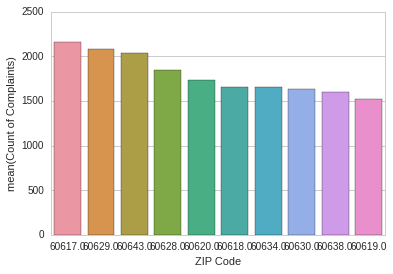

In [216]:
# finding out the worst neighborhoods
counts_df3 = df3['ZIP'].value_counts().reset_index()[:10]
counts_df3 = counts_df3.rename(columns = {0:'Count of Complaints', 'index':'ZIP Code'})

#counts_df2
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df3)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [217]:
#geocoding it to know which neighborhoods are doing the worst when it comes to pot holes complaints
geocoder.google('60617', method='reverse'), geocoder.google('60629', method='reverse'), geocoder.google('60643', method='reverse')

NameError: name 'geocoder' is not defined

In [218]:
#which type of surface has high number of requests of pot holes
df_unsorted = df3['ZIP'].groupby(df3['STATUS']).count().reset_index()
df_unsorted = df_unsorted.rename(columns = {'ZIP':'Count of Complaints'})

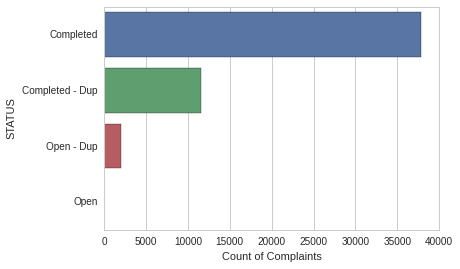

In [219]:
df_unsorted = df_unsorted.sort('Count of Complaints', ascending=False).reset_index()
df_unsorted
sns.set_style("whitegrid")
ax = sns.barplot(x='Count of Complaints', y='STATUS', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

In [220]:
# output by neighborhoods and pot holes status types
d = df3.groupby(['STATUS', 'ZIP'])['TYPE OF SERVICE REQUEST'].count().reset_index()
d = d.rename(columns = {'TYPE OF SERVICE REQUEST':'Count of Complaints'})

In [221]:
d.sort(['Count of Complaints', 'ZIP'], ascending=False)

,STATUS,ZIP,Count of Complaints
17,Completed,60617,1637
28,Completed,60629,1550
42,Completed,60643,1542
27,Completed,60628,1447
20,Completed,60620,1432
19,Completed,60619,1223
33,Completed,60634,1181
8,Completed,60608,1153
37,Completed,60638,1136
18,Completed,60618,1105


A close-up analysis into the Completion status of pot holes complaints and ZIP Codes reveal that highest number of complaints that were resolved (completed) in 2016 were received from the neighborhood 60617. 60629 registered second highest number of completed complaints regarding pot hotles. It can be seen from the table that most complaints that were received were completed in the same year i.e. 2016.

In [222]:
# caclulating response times

In [223]:
df3['CREATION DATE'] = df3['CREATION DATE'].apply(pd.to_datetime)

In [224]:
df3['COMPLETION DATE'] = df3['COMPLETION DATE'].apply(pd.to_datetime)

In [225]:
df3['Response Time'] = abs(df3['CREATION DATE'] - df3['COMPLETION DATE'])

In [226]:
df3 = df3.dropna()

In [227]:
df3['Response Time'] = df3['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

In [228]:
response_time_grouped = df3['Response Time'].groupby(df3['ZIP']).mean().reset_index()

In [229]:
response_time_grouped.sort('Response Time', ascending=False)

,ZIP,Response Time
28,60638,74.400000
21,60626,60.183673
25,60634,60.129032
42,60660,45.585185
33,60645,45.088235
14,60618,41.470588
20,60625,41.366492
30,60641,39.382979
41,60659,38.465517
18,60623,28.728972


This table shows that the ZIP Codes of 60638, 60626 and 60634 have had high mean response time of requests. 60605 neighborhood had the lowest reponse time i.e. 0. That could be a human entry or it could be possible that we received only one or few entries from that neighborhood which were resolved in the same day.

In [230]:
# finding out which neighborhoods have had high response times
geocoder.google('60638', method='reverse'), geocoder.google('60626', method='reverse'), geocoder.google('60634', method='reverse')

NameError: name 'geocoder' is not defined

In [234]:
response_time_grouped.sort('Response Time', ascending=True)

,ZIP,Response Time
4,60605,0.000000
0,60601,0.444444
8,60610,3.900000
2,60603,4.238095
1,60602,4.400000
35,60647,5.432749
43,60661,6.750000
17,60622,7.183406
31,60642,7.388889
11,60614,7.815029


In [236]:
geocoder.google('60605', method='reverse'), geocoder.google('60601', method='reverse')

NameError: name 'geocoder' is not defined

In [239]:
# showing output by Police District
grouped_police_RT = df3[['Response Time', 'LATITUDE', 'LONGITUDE']].groupby(df3['Police District']).mean().reset_index()

In [240]:
grouped_police_RT.sort('Response Time', ascending=False)

,Police District,Response Time,LATITUDE,LONGITUDE
20,25,57.160000,41.936989,-87.769620
19,24,51.967427,42.002141,-87.673205
14,17,37.713514,41.962085,-87.712332
17,20,35.862745,41.976513,-87.668303
13,16,35.574074,41.958797,-87.754181
9,10,28.728972,41.844280,-87.715914
16,19,21.331075,41.947395,-87.663057
3,3,19.782609,41.763802,-87.579749
2,2,18.314189,41.805679,-87.604024
7,8,16.826923,41.779860,-87.707877


Police districts number 25, 24 and 17 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to pothole requests than other police districts.

In [241]:
# lat, long of police district 24
geocoder.google(['41.936989', '-87.769620'], method='reverse')

NameError: name 'geocoder' is not defined

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# ANALYSIS OF SANITATION DATASET

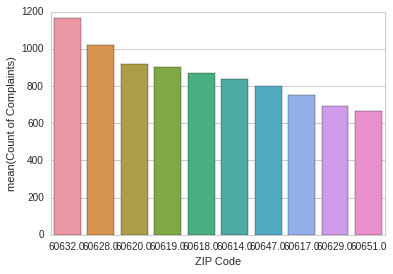

In [71]:
# finding out the worst neighborhoods
counts_df4 = df4['ZIP Code'].value_counts().reset_index()[:10]
counts_df4 = counts_df4.rename(columns = {0:'Count of Complaints', 'index':'ZIP Code'})

#counts_df4
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df4)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [279]:
#geocoding it to know which neighborhoods are doing the worst when it comes to graffiti complaints
geocoder.google('60632', method='reverse'), geocoder.google('60628', method='reverse'), geocoder.google('60620', method='reverse')

(<[OK] Google - Reverse [4610 S Trumbull Ave, Chicago, IL 60632, USA]>,
 <[OK] Google - Reverse [2926 W Shakespeare Ave, Chicago, IL 60647, USA]>,
 <[OK] Google - Reverse [3612 N Sacramento Ave, Chicago, IL 60618, USA]>)

In [280]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [281]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index() # make the graph
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='What Type of Surface is the Graffiti on?', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

ValueError: Could not interpret input 'What Type of Surface is the Graffiti on?'

Metal - Painted followed by both types of Brick surfaces (Unpainted and Painted) are the largest types of graffiti requests that the City of Chicago has received.

In [283]:
# output by neighborhoods and graffti types
d = df2.groupby(['What Type of Surface is the Graffiti on?', 'ZIP Code'])['Status'].count().reset_index()
d = d.rename(columns = {'Status':'Count of Complaints'})

In [284]:
d.sort(['Count of Complaints', 'ZIP Code'], ascending=False)[:10]

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,What Type of Surface is the Graffiti on?,ZIP Code,Count of Complaints
430,Metal - Painted,60632.0,3633
417,Metal - Painted,60618.0,3503
120,Brick - Painted,60632.0,3334
424,Metal - Painted,60625.0,3172
444,Metal - Painted,60647.0,2861
181,Brick - Unpainted,60632.0,2546
195,Brick - Unpainted,60647.0,2151
407,Metal - Painted,60608.0,2045
168,Brick - Unpainted,60618.0,1839
421,Metal - Painted,60622.0,1800


A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.

#caclulating response times

In [286]:
df2['Creation Date'] = df2['Creation Date'].apply(pd.to_datetime)

In [287]:
df2['Completion Date'] = df2['Completion Date'].apply(pd.to_datetime)

In [288]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [289]:
df2['Response Time'] = abs(df2['Creation Date'] - df2['Completion Date'])

In [290]:
df2['Response Time'] = df2['Response Time'].astype(pd.Timedelta).apply(lambda l: l.days)

In [291]:
response_time_grouped = df2['Response Time'].groupby(df2['ZIP Code']).mean().reset_index()

In [292]:
response_time_grouped.sort_values('Response Time', ascending=False)

,ZIP Code,Response Time
47,60649.0,1.151163
43,60644.0,1.026087
60,60827.0,1.000000
34,60635.0,1.000000
23,60623.0,0.897810
45,60646.0,0.822222
44,60645.0,0.812968
15,60615.0,0.804444
36,60637.0,0.799127
18,60618.0,0.794129


In [293]:
geocoder.google('60649', method='reverse'), geocoder.google('60644', method='reverse')

(<[OK] Google - Reverse [1835 E 72nd St, Chicago, IL 60649, USA]>,
 <[OK] Google - Reverse [37 N Lockwood Ave, Chicago, IL 60644, USA]>)

In [294]:
# showing output by Police District
grouped_police_RT = df2[['Response Time', 'Latitude', 'Longitude']].groupby(df2['Police District']).mean().reset_index()

Police districts number 15, 3 and 10 have a relatively high mean response time i.e. these police districts take a much higher time relatively to respond to grafiti requests than other police districts.

In [296]:
# lat, long of police district 24
geocoder.google(['41.884', '-87.75'], method='reverse')

<[OK] Google - Reverse [175 N Lavergne Ave, Chicago, IL 60644, USA]>

The neighborhood in which the Police takes a higher amount of response time is Lavergne Ave, which is reported not a safe neighborhood of Chicago. The City of Chicago should look into providing more training and resources to the police personnel in this district.

# Analysis of Vacant Buildings Dataset

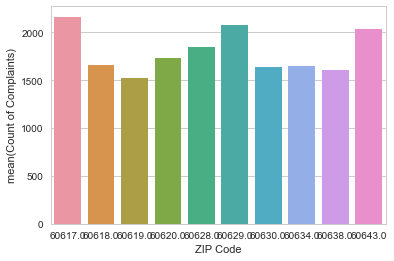

In [308]:
# finding out the worst neighborhoods
counts_df3 = df3['ZIP'].value_counts().reset_index()[:10]
counts_df3 = counts_df3.rename(columns = {'ZIP':'Count of Complaints', 'index':'ZIP Code'})

#counts_df2
sns.set_style("whitegrid")
ax = sns.barplot(x='ZIP Code', y='Count of Complaints', data=counts_df3)
sns.plt.show()

A value count of ZIP Code shows that the neighborhoods with ZIP Codes 60632, 60647 and 60618 have the highest number of graffiti requests. All of these are also highly residential areas.

In [309]:
#which type of surface has high number of requests of graffiti
df_unsorted = df3['ZIP'].groupby(df3['STATUS']).count()
df_unsorted = df_unsorted.rename(columns = {'ZIP':'Count of Complaints'})

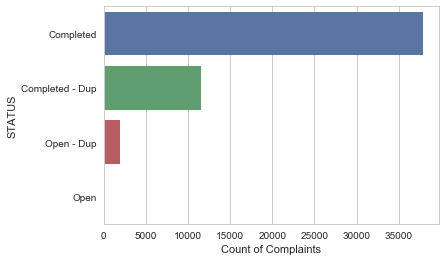

In [310]:
df_unsorted = df_unsorted.sort_values(0, ascending=False).reset_index()
df_unsorted
sns.set_style("whitegrid")
ax = sns.barplot(x=0, y='STATUS', data=df_unsorted)
ax.set(xlabel='Count of Complaints')
sns.plt.show()

In [311]:
# output by neighborhoods and pot holes status types
d = df3.groupby(['STATUS', 'ZIP'])['TYPE OF SERVICE REQUEST'].count().reset_index()
d = d.rename(columns = {'TYPE OF SERVICE REQUEST':'Count of Complaints'})

In [312]:
d.sort(['Count of Complaints', 'ZIP'], ascending=False)

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,STATUS,ZIP,Count of Complaints
17,Completed,60617.0,1637
28,Completed,60629.0,1550
42,Completed,60643.0,1542
27,Completed,60628.0,1447
20,Completed,60620.0,1432
19,Completed,60619.0,1223
33,Completed,60634.0,1181
8,Completed,60608.0,1153
37,Completed,60638.0,1136
18,Completed,60618.0,1105


In [ ]:
A close-up analysis into the Surface of Graffiti and ZIP Codes reveal that highest number of complaints in 2016 were received from the neighborhood 60632 regarding Metal-Painted. 60618 registered second highest number of complaints regarding Metal-Painted. It can also be seen from this table that most number of complaints were registered regarding Metal - Painted and Brick - Unpainted - two main problems that the City of Chicago should address.